1. what is BS 
2. y is it used 
3. where is it used (also in real life)
4. characteristics 
5. when to use a BS 
6. how to find, if a pblm requires BS 
7. TC of this 
8.

* seach algo in finite search space 
* CAN USE ONLY WHEN ITS SORTED 
* array must be UNIQUE 

In [8]:
def binary_search(arr,target):
    n=len(arr)
    l,h=0,n-1
    while l<=h:
        mid=(l+h)//2
        if arr[mid]==target:
            return mid 
        elif arr[mid]>target: 
            h=mid-1
        else: 
            l=mid+1
    return -1 #ele is not present in LL 

if __name__=="__main__":
    print(binary_search([3,4,6,7,9,12,16,17],16))
    print(binary_search([3,4,6,7,9,12,16,17],8))
          

6
-1


In [10]:
def rec_bs(arr,low,high,target):
    if low>high: return -1 
    mid=(low+high)//2
    if arr[mid]==target: return mid 
    elif arr[mid]>target: return rec_bs(arr,low,mid-1,target)
    else: return rec_bs(arr,low+1,high,target)

if __name__=="__main__":
    arr=[3,4,6,7,9,12,16,17]
    print(rec_bs(arr,0,len(arr)-1,16))
    print(rec_bs(arr,0,len(arr)-1,8))

6
-1


* rec BS intution
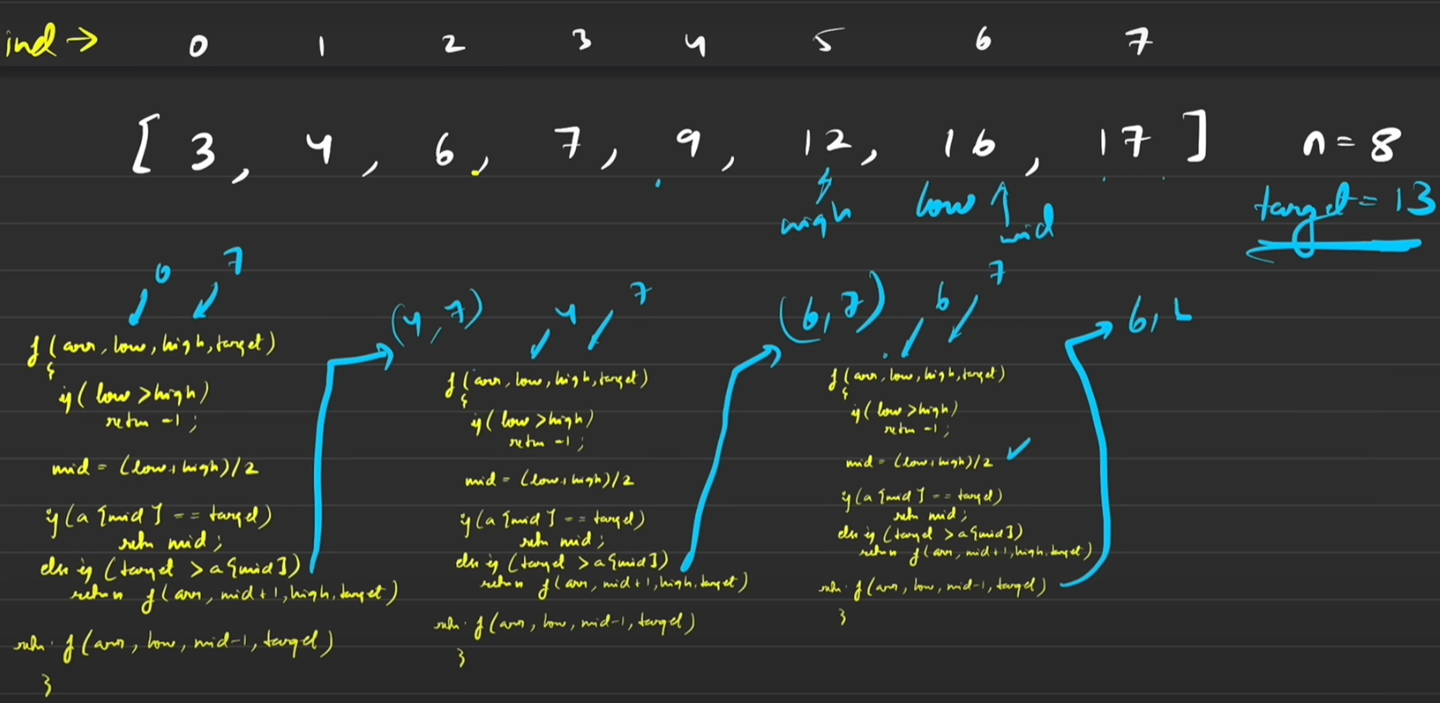
* TC 
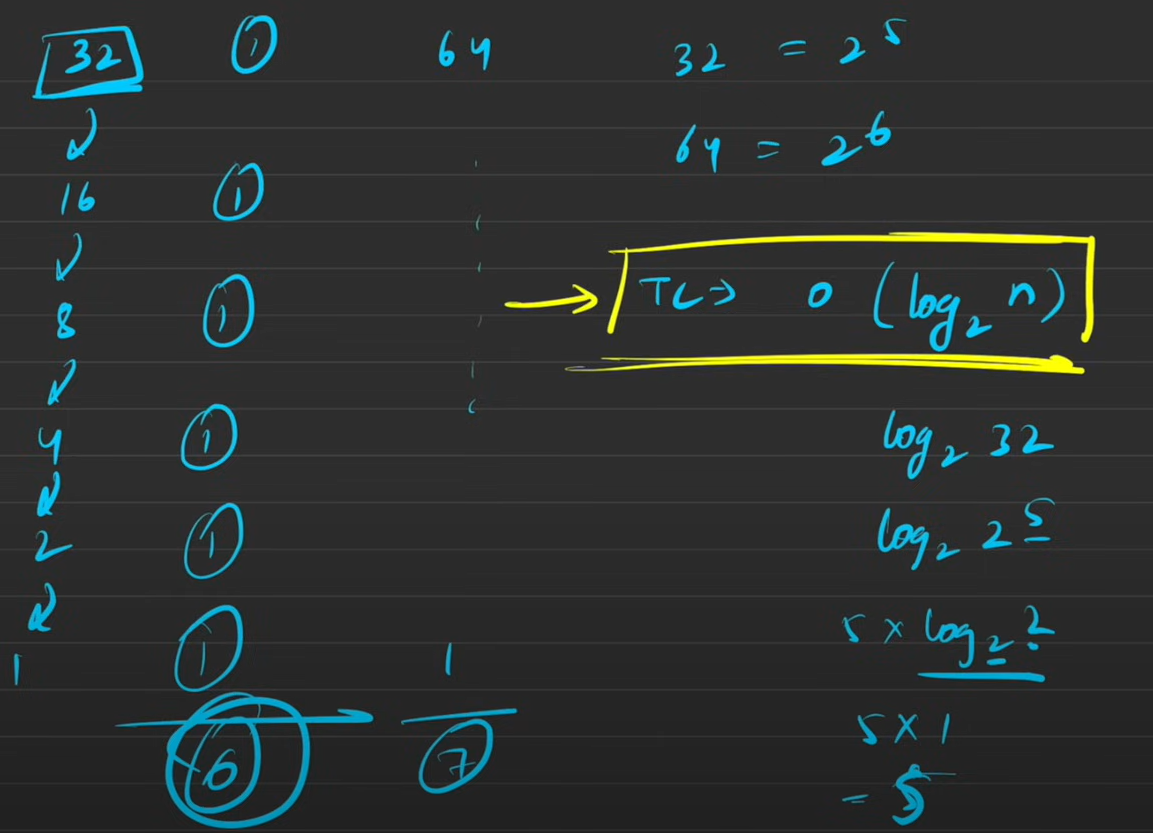
* if the length is near intmax, using a int dtype will create OVERFLOW issue when calculating mid, as it requires add of 2 such big nos, in that case using long would be an option, and in some cases u can modify the formule of mid as (low+ (high-low)//2)
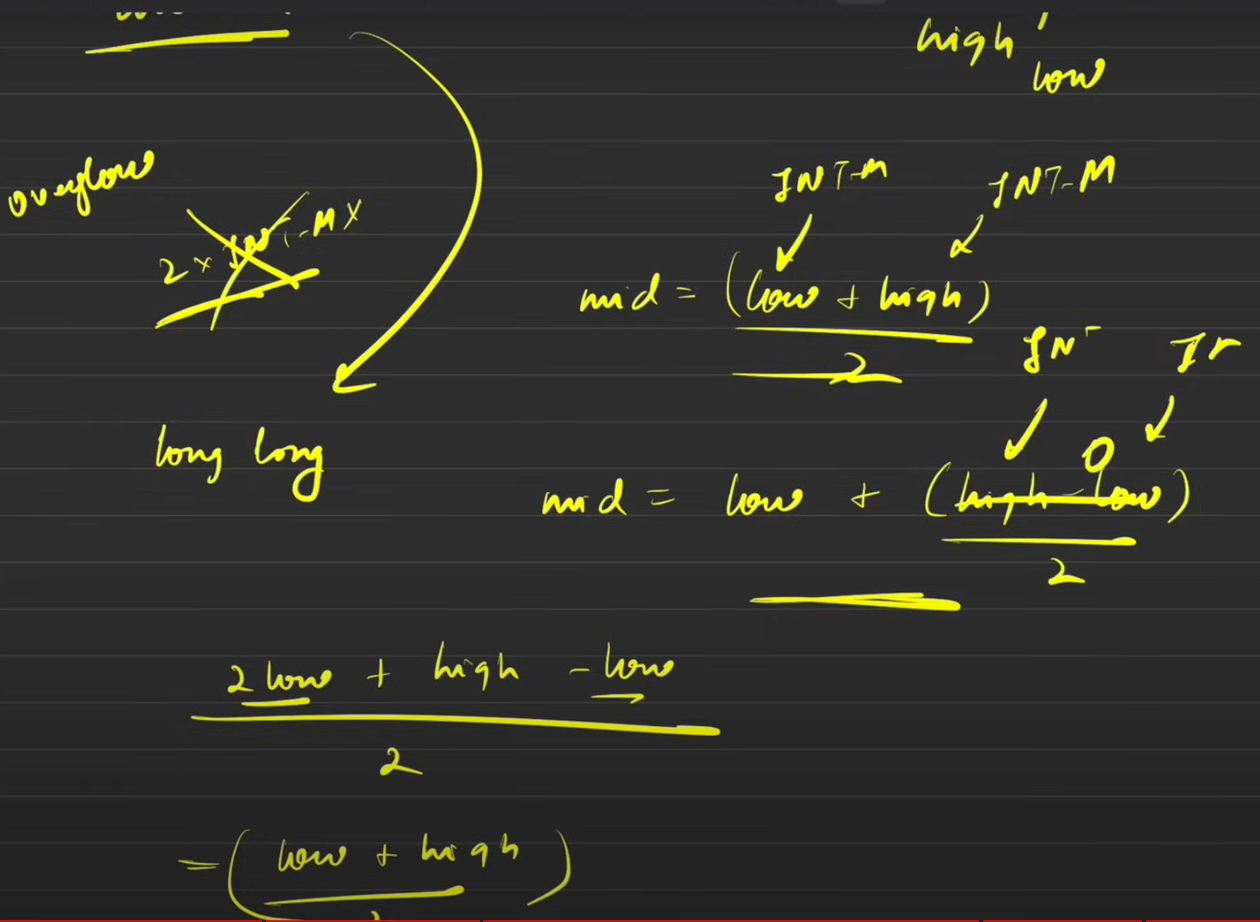

In [19]:
#1. Lower bound => smallest index such that arr[ind]>=x
#[1,2,3,3,5,8,8,10,10,11],x=9  Now lb is 7 as 10>=9
#std appr of finding lb using linear-search takes O(N), BS way takes O(log N)

def lower_bound(arr,x):
    l,h=0,len(arr)-1
    lb=len(arr) #set it to len, hypothetical- should return if lb cant be found in the existing arr

    while l<=h:
        mid=(l+h)//2
        if arr[mid]>=x: #may be an ans, go to left to look for smalleest ans
            lb=mid 
            h=mid-1 
        else: #maynot be the ans, go to right and look for ans 
            l=mid+1
    return lb 

#2. upper bound => smallest index such that arr[ind]>x 
def upper_bound(arr,x):
    l,h=0,len(arr)-1
    ub=len(arr) #set it to len, hypothetical- should return if lb cant be found in the existing arr

    while l<=h:
        mid=(l+h)//2
        if arr[mid]>x: #may be an ans, go to left to look for smalleest ans
            ub=mid 
            h=mid-1 
        else: #maynot be the ans, go to right and look for ans 
            l=mid+1
    return ub 

#3. search insert position 
#same as lower bound, (enter a value -> find the index pos it has to be inserted)
#if the element is alredy in arr, find the 1st occurance (smallest index solving arr[ind]>=x)
#in case of duplicates it will insert at 1st index 

#4. saerch insert position - II 
# if in case of duplicates and they want u to insert at the last occurance (smallest index solving arr[ind]>x)
#then use upper_bound() as it will give the index next to last occurance.

#5. if only the qn is to modify/ search only on a part of the whole arr
#along with lowerbound code pass the window on only which u want to search 

#6. floor and ceil in sorted arr 

#O(N+N)- not at all eff 
def floor_and_ceil_linear(arr,x):
    #ceil
    ceil=-1
    for i in range(len(arr)):
        if arr[i]>=x:
            ceil=arr[i]
            break 
    #floor 
    floor=-1
    for i in range(len(arr)-1,-1,-1):    
        if arr[i]<=x:
            floor= arr[i]
    return floor,ceil 
#O(N)- single loop, still not eff 
def floor_and_ceil_linear_eff(arr,x):
    floor,ceil=-1,-1
    for i in range(len(arr)):
        if x==arr[i]:#exact ele pres
            return arr[i],arr[i] #as floor and ceil will b that num itself
        elif arr[i]>=x:
            ceil=arr[i]
            break
        floor=arr[i] #keep updating the floor till u find a larger element 
    return floor,ceil 
#O(log N + log N)
def floor_and_ceil_long(arr,x): 
    #ceil is same as lower bound 
    ceil=-1#in case no ans
    l,h=0,len(arr)-1
    while l<=h:
        mid=(l+h)//2
        if arr[mid]>=x: #this might be my ans 
            ceil=mid #so store it 
            h=mid-1  #look for furthur smaller val (thus go to left part)
        else: #not present so increae the val, explore right part
            l=mid+1
    
    floor=-1 #incase no ans 
    l,h=0,len(arr)-1
    while l<=h: 
        mid=(l+h)//2
        if arr[mid]<=x: #this might be my ans, but u may not be the largest 
            floor=mid 
            l=mid+1
        else: #u cant be my ans (u are greater), so reduce, thus explore left part 
            h=mid-1 
    return arr[floor],arr[ceil] #incase of -1,-1 it returns last element - is that fine !!?!?!
#O(log N)- single BS for floor and ceil 
def floor_and_ceil(arr,x):
    l,h=0,len(arr)-1
    while l<=h:
        mid=(l+h)//2
        if arr[mid]==x: #exact ele then return them 
            return arr[mid],arr[mid]
        elif arr[mid]<x:#possible floor 
            floor=mid
            l=mid+1 #explore for larger value under x 
        else: #possible value for ceil 
            ceil=mid
            h=mid-1 #explore for smaller value under x 
    
    # If no valid floor or ceil found, they remain -1
    floor_value = arr[floor] if floor != -1 else -1
    ceil_value = arr[ceil] if ceil != -1 else -1
    
    return floor_value,ceil_value

#the abv logic is fine, 
# But think finding anyone is fine among floor/ceil (good, but some caes fail - chk blw !) 
#1. as we find floor_index then its next index will be the ceil_index 
#2. will also work even if the element is presest, as we will return the element itself if found initially 
#3. But this wont work, if floor is the last_element, then +1 will give err, so do a chk and return -1 
#4. also wont work, if ceil is the 1st value arr=[3,4,5],x=1, now as for floor,we shld chk and return -1 
#5. wont work on duplicate values (although passing duplicate arr for this qn is meaningless, but in realtime u may face it !)
#ex for 5th; arr=[1,2,5,7,7,7,9]x=8, floor is 7(index 3), but ceil is not index 4, as its a duplicate 

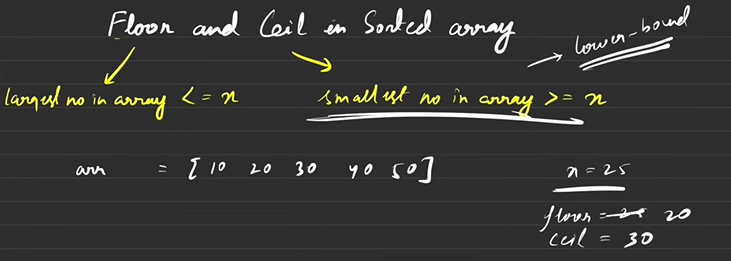

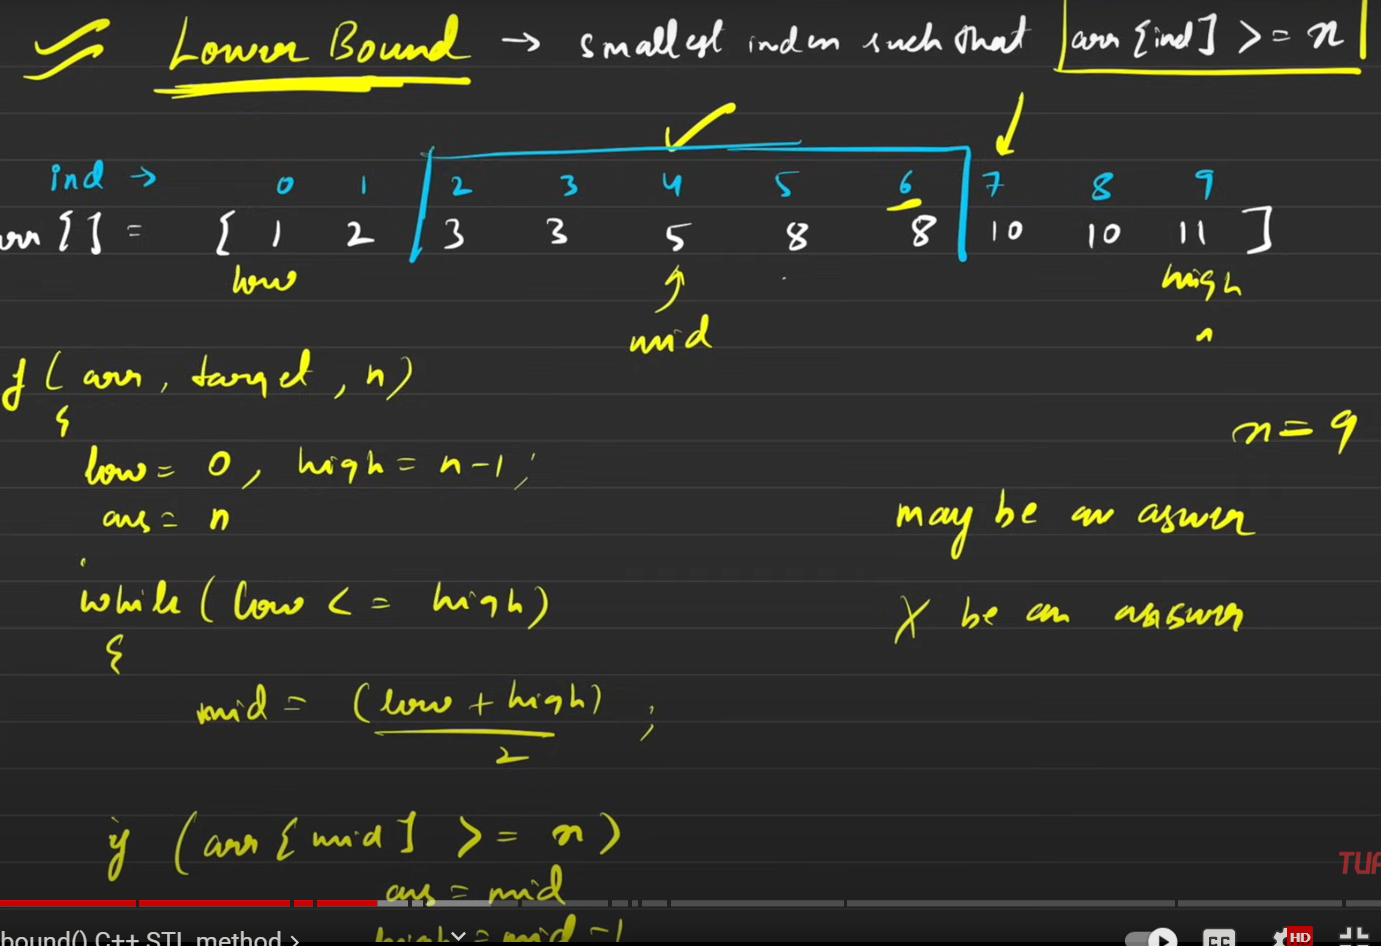

In [21]:
#O(N)
def first_and_last_occurance_linear(arr,x):
    first,last=-1,-1#if not presnt return -1,-1
    for i in range(len(arr)):
        if arr[i]==x:
            if first==-1:#1st time appearing, set both as i.
                first=i
                last=i
            else: #if appearing more than 1 time, update last to i.
                last=i 
    return first,last 

#O(log N)- BS (as its sorted)
def first_and_last_occurance(arr,x):
    # to cal lb 
    l,h=0,len(arr)-1
    lb=len(arr)#hyp value
    while l<=h:
        mid=(l+h)//2
        if arr[mid]>=x:
            lb=mid
            h=mid-1
        else:
            l=mid+1
    #to cal ub 
    l,h=0,len(arr)-1
    ub=len(arr)#hyp value 
    while l<=h:
        if arr[mid]>x:
            ub=mid
            h=mid-1
        else: l=mid+1
    
    if lb==len(arr) or arr[lb] != x: return -1,-1 #hyp(no lb,ub) or lb is not x(then x is not in arr)
    return lb,ub-1
    #lb is there but its not x => means the x is not in the arr 
    #lb is not there (lb==len(arr)) also means x is not in arr , infact x is greater than last ele in arr

#NOTE: [2,3,4,4,6,7]
# x=1, lb=2(0), ub=2(0) {lb==ub} fo=-1, lo=-1
# x=4, lb=4(2), ub=6(4) {lb!=ub} fo=lb, lo=ub-1
# x=6, lb=6(4), ub=7(5) {lb==ub} fo=lb, lo=ub-1
# x=9, lb=hyp(6), ub=hyp(6) {lb==ub} fo=-1, lo=-1

#NOTE: if there is lb then there is ub, if there is no lb then there is no ub
#NOTE: if there is lb and its x, ub is lo of x+1
#NOTE: if arr[lb] !=x then x is not in arr. (coz if present then that would've been the lb !!!)

# SIMPLE BS APPR : when interviwer not happy with this lb,ub and want a simple BS (no complications- follow blw mtd !)
#same TC: 2xO(log N) SC:O(1)
def first_and_last_occurance_simple_bs(arr,x):
    l,h=0,len(arr)-1
    first,last=-1,-1#if x not in arr

    #to find 1st occ
    while l<=h:
        mid=(l+h)//2
        if arr[mid]==x:#means i found one occurance, but let me seacrch for 1st occ => go left part (as its sorted)
            first=mid
            h=mid-1
        elif arr[mid]<x: #not the ele we need,but our val is smaller than x => so move to right 
            l=mid+1
        else: #not ele we need and our val is higher => to reduce move left
            h=mid-1
    
    #NOTE: chk - saves some time ! O(logN)
    if first==-1: #as if there is no 1st occ, there wont be a last occurace as wel 
        return -1,-1 #this will save u logN time !!!
    
    #to find last occ 
    l,h=0,len(arr)-1
    while l<=h:
        mid=(l+h)//2
        if arr[mid]==x:#means i found 1 occurance, but let me search for last occ => go right 
            last=mid 
            l=mid+1
        elif arr[mid]>x: #ele is not we need sand greater than x, we need smaller one => so move left
            h=mid-1
        else: #not the element we need and our val is smaller than x=> so move right
            l=mid+1

    return first,last if first!=-1 else -1,-1   

#TODO: Explore bisect_left() and bisect_right() in python for finding LB and UB 

* works here
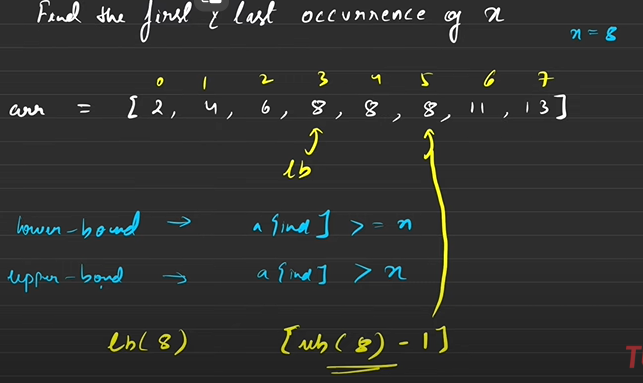
* wont work as ele not in list ,also when lb points to hyp index (len(arr)), also wont it work when ub is 0th index ?? - No it works and ub is 0 then 0-1 is -1 and returned 
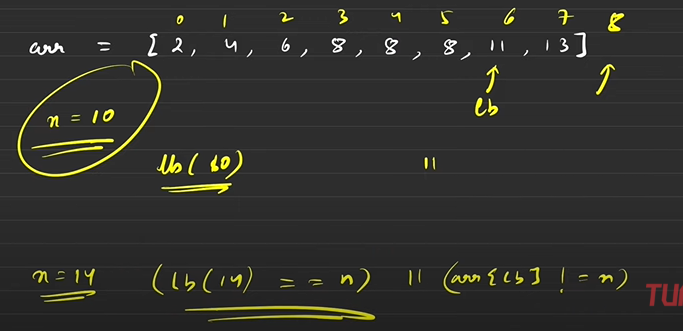

In [22]:
#Search ele in rotated sorted arr I - unique elements

#In sorted arr -> we do 1 chk and eliminate either left/right half as the halves are also sorted,
# but its not the case in rotated sorted arr like [7,8,9,1,2,3,4,5,6] x=8
# l=0(7),h=8(6),m=4(2) Now we cant say as 2>8 and eliminate left half l

#1. divide into left and right 
#2. Identify sorted arr - and chk if x lies in that part, if so proceeed furthur
#3. if x in unsorted part, again follow the same appr

def search_rotated_sorted_arr_I(arr,x):
    l,h=0,len(arr)-1
    while l<=h:
        mid=(l+h)//2
        if arr[mid]==x: return mid

        #find sorted half (either left sorted / right sorted)
        if arr[l]<=arr[mid]: #1st half sorted
            if arr[l]<=x and x<=arr[mid]: #x lies in sorted 1st half 
                h=mid-1 #eliminate right half (2nd half)
            else:
                l=mid+1 #x lies in unsorted 2nd half 

        else: #if arr[h]>arr[mid]: #2nd half sorted
            if arr[mid]<=x and x<=arr[h]:
                l=mid+1 #leliminate left half (1st half)
            else: #not in this sorted second part
                h=mid-1 
    return -1 


* Search in rotated sorted arr I (unique)
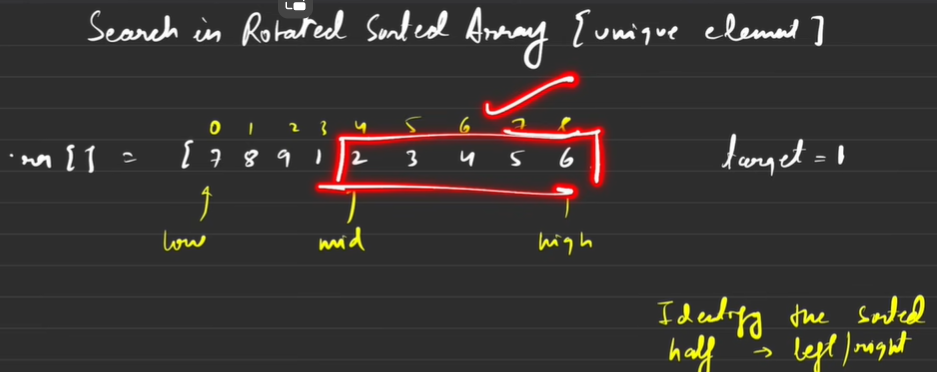

* Search in rotated sorted arr II (with duplicates)
* TIP: if found a pblm involving dupliactes, try the same with unique vals and chk where it fails, now try to fit in the failing cases !!!
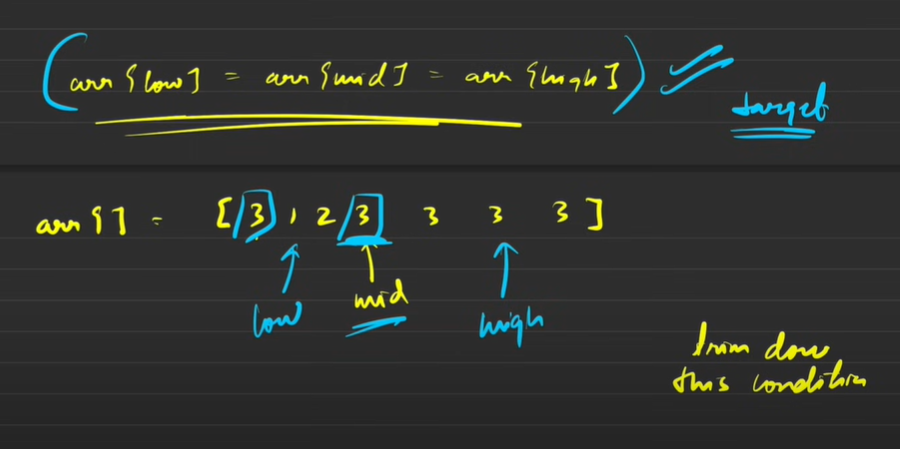

1. This is the only contd that stopping me from using the prev code
2. so, try to trim that => TRIM DOWN THE SEARCH SPACE 
3. obv it cant be my target (we compare this first arr[mid]==target in bfore step), so remove such element in 1st and last 
4. there might be many of such duplicates, so try to remove all - by using "continue" till u remove all 
5. then proceed like u did in prev (find sorted part, chk in that part and after that change l/h ptrs accordingly)  


* why search in rot sort nums -I wont work here 
- - Ex case [3,1,2,3,3,3,3,3], x=3, l=0(3), m=3(3), h=7(3)
as by our chk both will be sorted nums and code fails !
- -  NOTE here they asked to say True/False not to return the indexes(duplicates) as for that linear search is the only way !
* TC 
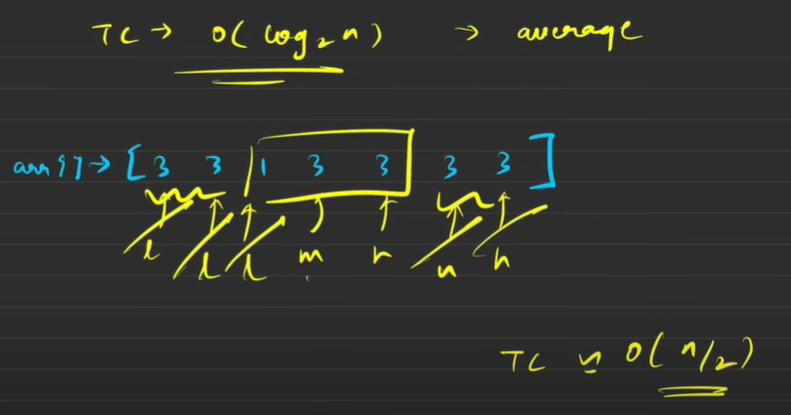